<div style='background-color : orange'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align : center'>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#q1'>Question 1</a></li>
<li><a href='#q2'>Question 2</a></li>
<li><a href='#q3'>Question 3</a></li>

<div style='background-color : orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align : center'>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
# Vectorization and dataframing
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# .py files
import wrangle as w

In [2]:
# Set default plt style to 'bmh'
mpl.style.use('bmh')

<div style='background-color : orange'>
<a id='q1'></a>
    <b><u><i><h1 style='text-align : center'>
        Question 1
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#q1a'>Question 1a</a></li>
<li><a href='#q1b'>Question 1b</a></li>
<li><a href='#q1c'>Question 1c</a></li>
<li><a href='#q1d'>Question 1d</a></li>

Using <a href='https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'>lemonade.csv</a> dataset and focusing on continuous variables:

In [3]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'
lemonade = pd.read_csv(url, index_col=0)
lemonade.sample()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
7/23/17,Sunday,89.1,0.51,72,0.5,37


---

<a id='q1a'></a>
<b>Question 1a.</b> Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#q1'>Question 1 Top</a></li>

In [4]:
# Identify continuous columns
cont_cols = lemonade.select_dtypes(include=['float', 'int']).columns.to_list()

In [5]:
# Identify all of the outliers via tukey method
w.find_outliers_tukey(lemonade, cont_cols)

 ==========Temperature // k=1.5==========
Values < 16.70: 1 Values
[15.1]

Values > 104.70: 1 Values
[212.0]


 ==========Rainfall // k=1.5==========
Values < 0.26: 0 Values
[]

Values > 1.30: 28 Values
[2.0, 1.33, 1.33, 1.54, 1.54, 1.54, 1.33, 1.33, 1.67, 1.43, 1.43, 1.54, 1.33, 1.33, 1.54, 1.82, 1.43, 1.82, 1.33, 1.43, 1.54, 1.33, 1.43, 1.33, 1.54, 1.43, 1.43, 2.5]


 ==========Flyers // k=1.5==========
Values < 4.00: 1 Values
[-38]

Values > 76.00: 2 Values
[77, 80]


 ==========Price // k=1.5==========
Values < 0.50: 0 Values
[]

Values > 0.50: 0 Values
[]


 ==========Sales // k=1.5==========
Values < 5.00: 0 Values
[]

Values > 45.00: 4 Values
[143, 158, 235, 534]




<b><i> Takeaway </i></b>

- Flyer column
    - -38
        - Doesn't make sense to have negative amount of flyers

---

<a id='q1b'></a>
<b>Question 1b.</b> Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#q1'>Question 1 Top</a></li>

In [6]:
# Identify outlier values
w.find_outliers_tukey(lemonade, cont_cols)

 ==========Temperature // k=1.5==========
Values < 16.70: 1 Values
[15.1]

Values > 104.70: 1 Values
[212.0]


 ==========Rainfall // k=1.5==========
Values < 0.26: 0 Values
[]

Values > 1.30: 28 Values
[2.0, 1.33, 1.33, 1.54, 1.54, 1.54, 1.33, 1.33, 1.67, 1.43, 1.43, 1.54, 1.33, 1.33, 1.54, 1.82, 1.43, 1.82, 1.33, 1.43, 1.54, 1.33, 1.43, 1.33, 1.54, 1.43, 1.43, 2.5]


 ==========Flyers // k=1.5==========
Values < 4.00: 1 Values
[-38]

Values > 76.00: 2 Values
[77, 80]


 ==========Price // k=1.5==========
Values < 0.50: 0 Values
[]

Values > 0.50: 0 Values
[]


 ==========Sales // k=1.5==========
Values < 5.00: 0 Values
[]

Values > 45.00: 4 Values
[143, 158, 235, 534]




<b><i> Takeaway </i></b>

- Temperature column
    - 212
        - That's a REALLY hot day
- Sales column
    - 143, 158, 235, 534
        - EXTREMELY far off from what's normal

---

<a id='q1c'></a>
<b>Question 1c.</b> Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#q1'>Question 1 Top</a></li>

In [7]:
# Identify outliers
w.find_outliers_tukey(lemonade, cont_cols, k=3)

 ==========Temperature // k=3==========
Values < -16.30: 0 Values
[]

Values > 137.70: 1 Values
[212.0]


 ==========Rainfall // k=3==========
Values < -0.13: 0 Values
[]

Values > 1.69: 4 Values
[2.0, 1.82, 1.82, 2.5]


 ==========Flyers // k=3==========
Values < -23.00: 1 Values
[-38]

Values > 103.00: 0 Values
[]


 ==========Price // k=3==========
Values < 0.50: 0 Values
[]

Values > 0.50: 0 Values
[]


 ==========Sales // k=3==========
Values < -10.00: 0 Values
[]

Values > 60.00: 4 Values
[143, 158, 235, 534]




<b><i> Takeaway </i></b>

- Flyer column
    - -38
        - Doesn't make sense to have negative amount of flyers

---

<a id='q1d'></a>
<b>Question 1d.</b> Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#q1'>Question 1 Top</a></li>

In [8]:
# Identify outliers
w.find_outliers_tukey(lemonade, cont_cols, k=3)

 ==========Temperature // k=3==========
Values < -16.30: 0 Values
[]

Values > 137.70: 1 Values
[212.0]


 ==========Rainfall // k=3==========
Values < -0.13: 0 Values
[]

Values > 1.69: 4 Values
[2.0, 1.82, 1.82, 2.5]


 ==========Flyers // k=3==========
Values < -23.00: 1 Values
[-38]

Values > 103.00: 0 Values
[]


 ==========Price // k=3==========
Values < 0.50: 0 Values
[]

Values > 0.50: 0 Values
[]


 ==========Sales // k=3==========
Values < -10.00: 0 Values
[]

Values > 60.00: 4 Values
[143, 158, 235, 534]




<b><i> Takeaway </i></b>

- Temperature column
    - 212
        - That's a REALLY hot day
- Sales column
    - 143, 158, 235, 534
        - EXTREMELY far off from what's normal

<div style='background-color : orange'>
<a id='q2'></a>
    <b><u><i><h1 style='text-align : center'>
        Question 2
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 2.</b> Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?

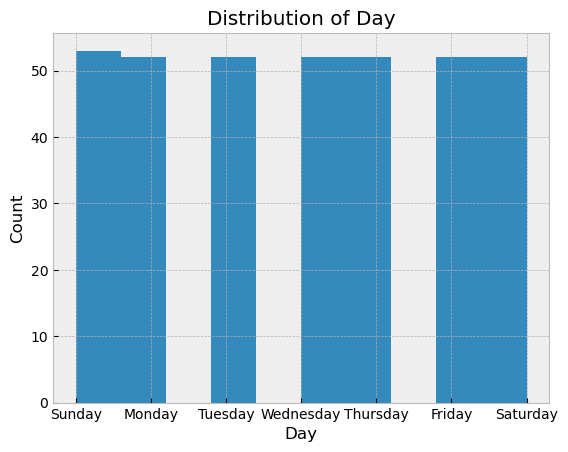

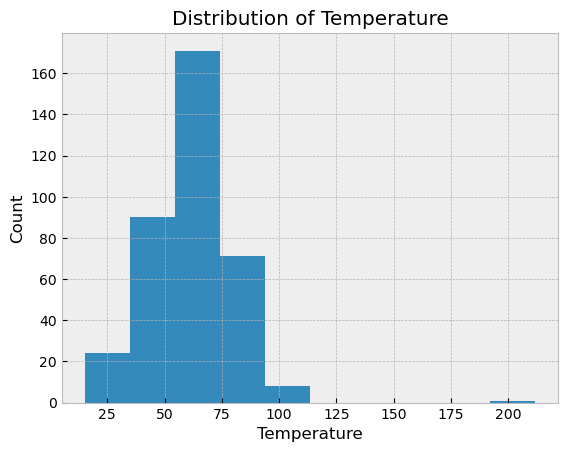

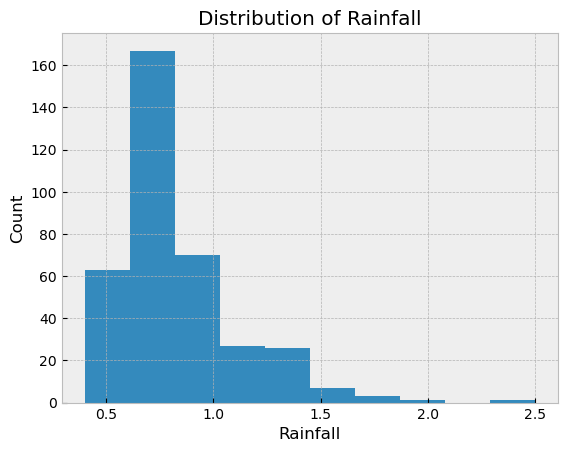

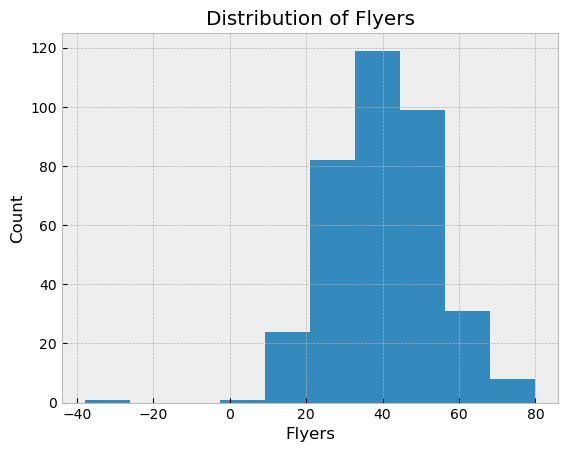

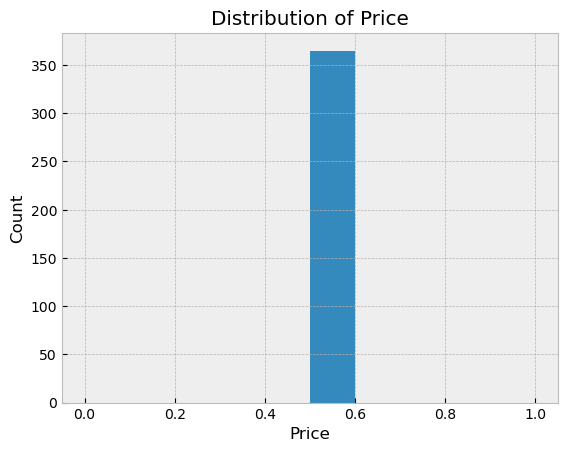

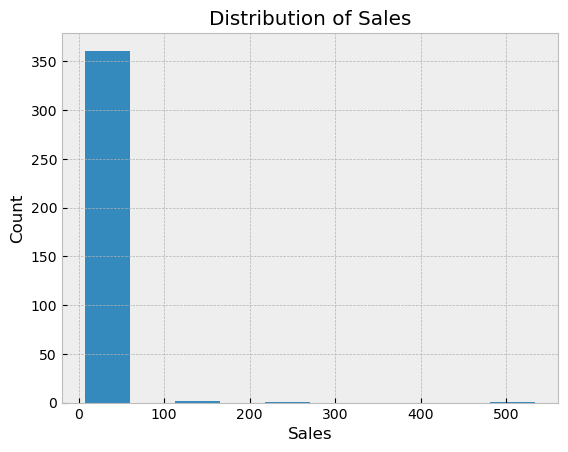

In [9]:
# Identify columns that are normally distributed
for col in lemonade:
    plt.hist(data=lemonade, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.show()

<b><i> Normally Distributed Columns: </i></b>

- Temperature
- Flyers

In [10]:
# Create list of normally distributed columns
norm_cols = [
    'Temperature',
    'Flyers'
]

In [11]:
# Find outliers using the sigma 2 rule
w.find_outliers_sigma(lemonade, norm_cols, sigma=2)

 ==========Temperature // sigma=2==========
MEAN: 61.22
STD: 18.09
Outliers: 10
Date
2/11/17     212.0
6/16/17      99.3
6/26/17     102.6
7/1/17      102.9
7/10/17      98.0
7/18/17      99.3
7/22/17      99.6
7/27/17      97.9
12/5/17      22.0
12/31/17     15.1
Name: Temperature, dtype: float64


 ==========Flyers // sigma=2==========
MEAN: 40.10
STD: 13.79
Outliers: 13
Date
6/16/17     77
6/20/17     70
6/21/17     76
7/2/17      68
7/3/17      68
7/14/17     80
7/18/17     76
7/23/17     72
7/24/17     69
7/27/17     74
11/21/17   -38
12/5/17     11
12/31/17     9
Name: Flyers, dtype: int64




<b><i> Takeaway </i></b>
- Temperature column
    - 212
        - Looking at the dates for all the temperatures seem reasonable except for 212 since it's extremely high for a temperature
- Flyer column
    - -38
        - Looking at the dates for all the flyers seem reasonable except for -38 since it doesn't make sense to have a negative amount of flyers

<div style='background-color : orange'>
<a id='q3'></a>
    <b><u><i><h1 style='text-align : center'>
        Question 3
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 3.</b> Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [12]:
# Find the outliers using the 3 sigma rule
w.find_outliers_sigma(lemonade, norm_cols, sigma=3)

 ==========Temperature // sigma=3==========
MEAN: 61.22
STD: 18.09
Outliers: 1
Date
2/11/17    212.0
Name: Temperature, dtype: float64


 ==========Flyers // sigma=3==========
MEAN: 40.10
STD: 13.79
Outliers: 1
Date
11/21/17   -38
Name: Flyers, dtype: int64




<b><i> Takeaway </i></b>
- Temperature column
    - 212
        - Looking at the dates for all the temperatures seem reasonable except for 212 since it's extremely high for a temperature
- Flyer column
    - -38
        - Looking at the dates for all the flyers seem reasonable except for -38 since it doesn't make sense to have a negative amount of flyers